# 7.1. Hàm mất mát của SVM

## 7.1.1. Góc nhìn từ hồi qui Logistic

Trong [hồi qui Logistic](https://phamdinhkhanh.github.io/deepai-book/ch_ml/classification.html) chúng ta đã làm quen với _hàm mất mát_ (_loss function_) dạng:

$$\mathcal{L}(\mathbf{w}) = \sum_{i=1}^{n} -[y_i\log(\hat{y_i}) + (1-y_i)\log(1-\hat{y}_i)]$$

Bản chất của hàm mất mát trong hồi qui Logistic là một _thước đo_ về sự tương quan giữa phân phối xác suất dự báo với _ground truth_.

Trong đó phân phối xác suất được ước tính dựa trên hàm `Sigmoid` theo công thức $\hat{y} = \sigma(z) = \frac{1}{1+e^{-z}}$.

Ta cũng biết rằng đường biên phân loại của hồi qui Logistic là một siêu phẳng có phương trình $\mathbf{w}^{\intercal}\mathbf{x}$.

$$
\begin{split}
y = \left\{
\begin{matrix}
1 \text{ if } \mathbf{w}^{\intercal}\mathbf{x} > 0 \\
0 \text{ if } \mathbf{w}^{\intercal}\mathbf{x} \leq 0
\end{matrix}
\right.\end{split}
$$

Tiếp theo chúng ta sẽ cùng phân tích _hàm mất mát_ của mô hình trong hai trường hợp $y=0$ và $y=1$:

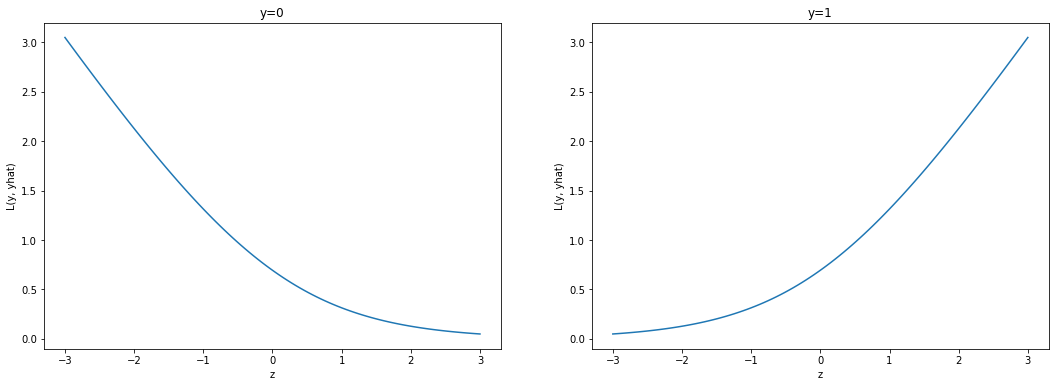

In [1]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize = (18, 6))
z = np.linspace(-3, 3, 100)

def sigmoid(z):
  return 1/(1+np.exp(-z))

y0 = -np.log(sigmoid(z)) # Trường hợp ground truth = 0
y1 = -np.log(1-sigmoid(z)) # Trường hợp ground truth = 1

# Hàm mất mát nếu ground truth = 0
ax[0].plot(z, y0)
ax[0].set_xlabel('z')
ax[0].set_ylabel('L(y, yhat)')
ax[0].set_title('y=0')

# Hàm mất mát nếu ground truth = 1
ax[1].plot(z, y1)
ax[1].set_xlabel('z')
ax[1].set_ylabel('L(y, yhat)')
ax[1].set_title('y=1')
plt.show()

Ta nhận thấy hình dạng của _hàm mất mát_ trong hai trường hợp tương ứng với $y=1$ và $y=0$ là trái ngược nhau:

* Đối với trường hợp nhãn $y = 0$: Khi giá trị của $z$ càng lớn thì hàm mất mát sẽ tiệm cận 0. Điều đó đồng nghĩa với mô hình sẽ phạt ít những trường hợp $z$ lớn và có nhãn 0. Những trường hợp này tương ứng với những điểm nằm cách xa đường biên phân chia.

* Đối với nhãn $y=1$ thì trái lại, mô hình có xu hướng phạt ít với những giá trị $z$ nhỏ. Khi đó những điểm này sẽ nằm cách xa đường biên về phía nửa mặt phẳng $y=1$.

Những phân tích ở trên là hợp lý vì ở các mức giá trị $z$ đủ lớn hoặc đủ nhỏ thì đều là các điểm nằm cách xa đường biên phân chia nên chúng ta có thể dễ dàng dự báo đúng nhãn cho chúng. Việc phạt những điểm này nếu phân loại sai không mang nhiều ý nghĩa bằng phạt những điểm nằm gần đường biên và được xem như là case khó (_hard case_). Thậm chí nếu phạt những điểm nằm xa đường biên một giá trị lớn dễ khiến xảy ra nguy cơ _quá khớp_ vì hầu hết những điểm đó đều là _ngoại lai_.

## 7.1.2. Từ Logistic tới SVM
Trong SVM chúng ta có một thay đổi đột phá đó là tìm cách xấp xỉ hàm mất mát dạng cross-entropy của Logistic bằng một hàm mà chỉ phạt những điểm ở gần đường biên thay vì phạt những điểm ở xa đường biên bằng cách đưa mức phạt về 0.

Cụ thể đó là hai hàm phạt $\text{cost}_1()$ và $\text{cost}_2()$ tương ứng với $y=0$ và $y=1$ như bên dưới:


$$\begin{split}
\left\{
\begin{matrix}
\text{cost}_1(z) = \max(0, 1-z) ~ \text{if } y=0 \\
\text{cost}_2(z) = \max(1+z, 0) ~ \text{if } y=1
\end{matrix}
\right.\end{split}$$

Hai hàm này thể hiện chi phí phải bỏ ra nếu phân loại sai các nhãn lần lượt thuộc $0$ hoặc $1$. Dạng tổng quát của chúng là $\max(0, t)$ còn được gọi là hàm hingloss. Đây là một trong những hàm mất mát mà bạn sẽ gặp khá nhiều trong machine learning.

Bên dưới là hình dạng của hai hàm $\text{cost}_1()$ và $\text{cost}_2()$.

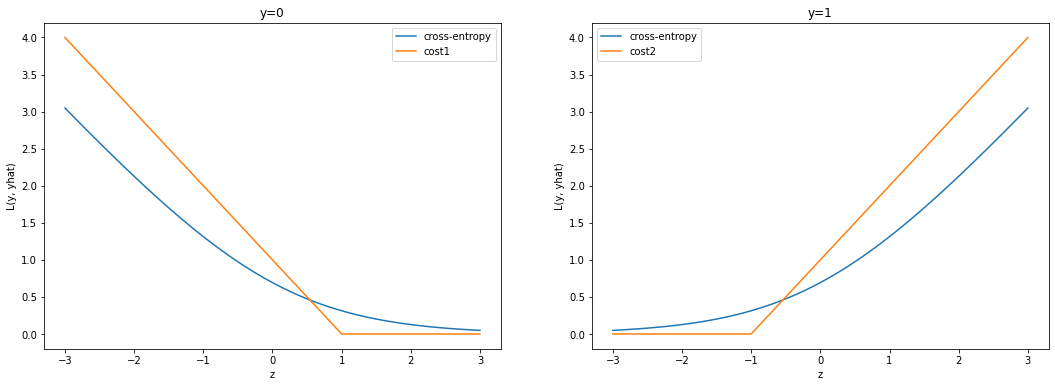

In [2]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize = (18, 6))
z = np.linspace(-3, 3, 100)

def sigmoid(z):
  return 1/(1+np.exp(-z))

y0 = -np.log(sigmoid(z)) # Trường hợp ground truth = 0
y1 = -np.log(1-sigmoid(z)) # Trường hợp ground truth = 1

cost1 = np.maximum(0, 1-z)
cost2 = np.maximum(1+z, 0)

# Hàm mất mát nếu ground truth = 0
ax[0].plot(z, y0)
ax[0].plot(z, cost1)
ax[0].set_xlabel('z')
ax[0].set_ylabel('L(y, yhat)')
ax[0].legend(labels = ['cross-entropy', 'cost1'])
ax[0].set_title('y=0')

# Hàm mất mát nếu ground truth = 1
ax[1].plot(z, y1)
ax[1].plot(z, cost2)
ax[1].set_xlabel('z')
ax[1].set_ylabel('L(y, yhat)')
ax[1].legend(labels = ['cross-entropy', 'cost2'])
ax[1].set_title('y=1')

plt.show()

Ta nhận thấy hình dạng của các hàm mất mát $\text{cost}_1$ và $\text{cost}_2$ cũng gần tương tự như cross-entropy. Điểm khác biệt chính đó là giá trị của mất mát bằng 0 nếu $z \geq 1$ (đối với nhãn $y=0$) hoặc $z \leq -1$ (đối với nhãn $y=1$). Theo các hàm mất mát mới này, chúng ta bỏ qua việc phạt phân loại sai những điểm nằm xa đường biên. Đối với những điểm nằm gần đường biên nhất thì mới ảnh hưởng tới hàm mất mát. Tập hợp những điểm nằm gần đường biên sẽ giúp xác định đường biên và được gọi là tập tập hỗ trợ (_support vector_).

Như vậy sau khi thay đổi hàm phạt ta thu được hàm mất mát mới dạng:

$$\mathcal{L}(\mathbf{w}) = \sum_{i=1}^{n} -[y_i\text{cost}_1(\hat{y_i}) + (1-y_i)\text{cost}_2(1-\hat{y}_i)]$$

SVM cho phép ta giảm thiểu _quá khớp_ thông qua một thành phần điều chuẩn cũng tương tự như hồi qui Logistic.

$$\mathcal{L}(\mathbf{w}) = C(\sum_{i=1}^{n} -[y_i\text{cost}_1(\hat{y_i}) + (1-y_i)\text{cost}_2(1-\hat{y}_i)])+\frac{\lambda}{2} \underbrace{||\mathbf{w}||_2^2}_{\text{regularization term}}$$

Trong công thức trên thì hằng số $C > 0$ thể hiện ảnh hưởng của sai số phân loại lên hàm mất mát. Trong khi $\lambda > 0$ là hằng số của thành phần điều chuẩn (_regularization term_) thể hiện tác động của độ lớn trọng số hồi qui $\mathbf{w}$ lên hàm mất mát.

Khi tăng tỷ lệ $\frac{\lambda}{C}$ có thể giúp các trọng số của mô hình được kiểm soát về độ lớn, thông qua đó làm cho độ phức tạp của đường biên phân chia giảm và kiểm soát hiện tượng _quá khớp_.

Đối với phương trình hồi qui Logistic thì chúng ta sẽ xác định nhãn dựa trên dấu của $\mathbf{w}^{\intercal}\mathbf{x}$. Còn trong thuật toán SVM, đối với một tập dữ liệu mà các nhãn là phân tuyến (_linear seperable_) (tức là tồn tại ít nhất 1 đường biên phân loại đúng toàn bộ các điểm) thì chúng ta sẽ mở rộng đường biên phân chia về hai phía là 1 đơn vị. Khi đó một điểm được dự báo là:


$$\begin{split}
y = \left\{
\begin{matrix}
0 ~ \text{if } \mathbf{w}^{\intercal}\mathbf{x} \leq -1 \\
1 ~ \text{if } \mathbf{w}^{\intercal}\mathbf{x} \geq 1 
\end{matrix}
\right.\end{split}$$

Ý nghĩa của việc mở rộng đường biên đó là khiến cho các điểm nằm gần với đường biên sẽ trở nên tách biệt hơn. Tiếp theo chúng ta sẽ tìm hiểu cơ chế nào hoạt động và cách xác định đường biên đối với thuật toán SVM.

# 7.2. Đường biên và lề trong SVM


**Tập dữ liệu của bài toán SVM**

Giả sử tập dữ liệu huấn luyện $\mathcal{Z}$ bao gồm $N$ điểm dữ liệu. Trong đó điểm dữ liệu thứ $i$ là $Z_i = (\mathbf{x}_i, y_i)$ với $\mathbf{x}_i \in \mathbb{R}^{d}$ là véc tơ đầu vào và $y_i$ là biến mục tiêu là một trong hai giá trị $\{-1, 1\}$. Tập dữ liệu này được giả định là phân tuyến (_linear seperable_).

Bên dưới là hình ảnh tập dữ liệu phân tuyến, đường biên và lề trong thuật toán SVM.

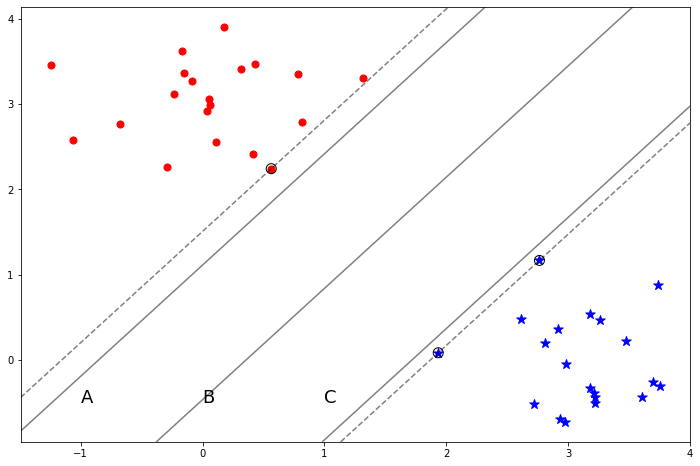

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=[(0, 3), (3, 0)], cluster_std=[0.5, 0.5], random_state=6)
idx_cls_0 = np.where(y == 0)
idx_cls_1 = np.where(y == 1)
# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

plt.figure(figsize = (12, 8))

plt.scatter(X[idx_cls_0, 0], X[idx_cls_0, 1], c='red', marker='o', s=50)
plt.scatter(X[idx_cls_1, 0], X[idx_cls_1, 1], c='blue', marker='*', s=100)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
B = clf.decision_function(xy).reshape(XX.shape)
A = B-0.9
C = B+0.8
# plot decision boundary and margins
ax.contour(XX, YY, B,  colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.contour(XX, YY, A, colors='k', levels=[0], alpha=0.5,
           linestyles=['-'])

ax.contour(XX, YY, C, colors='k', levels=[0], alpha=0.5,
           linestyles=['-'])

# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           marker='o',linewidth=1, facecolors='none', edgecolors='k')

ax.text(0, -0.5, 'B', fontsize=18)
ax.text(-1, -0.5, 'A', fontsize=18)
ax.text(1, -0.5, 'C', fontsize=18)
plt.show()

**Hình 1:** Hình ảnh về tập dữ liệu trong bài toán phân loại nhị phân mà các lớp là _phân tuyến_. Ba đường thẳng `A, B, C` đại diện cho ba đường biên phân chia đúng **mọi điểm dữ liệu**. Những điểm hình tròn nằm bên trái thuộc mặt dương có nhãn $y=1$, những điểm hình sao nhằm bên phải thuộc mặt âm nhãn $y=-1$. Sở dĩ chúng ta gán nhãn như vậy là vì tại cùng một dữ liệu đầu vào $\mathbf{x}$ thì mặt dương bên trái sẽ có giá trị lớn hơn mặt âm bên phải.


**Lựa chọn đường biên phân chia tương ứng với một phương**

Ba đường thẳng `A, B, C` ở ví dụ trên là ba đường biên phân chia song song và có cùng phương. Trong ba đường biên phân chia thì đường biên `B` là công bằng nhất vì chúng cách đều các điểm gần nhất thuộc hai lớp. Còn lựa chọn `A` và `C` sẽ không công bằng vì chúng ta sẽ dễ thiên vị một lớp hơn lớp còn lại. 

Như vậy để cho công bằng thì đường biên phải luôn nằm chính giữa và cách đều các điểm gần nhất với nó. Đồng thời đối với bài toán Hard-Margin SVM thì tập dữ liệu là phân tuyến nên đường biên cần phải phân loại đúng mọi điểm dữ liệu. Chúng ta coi độ rộng của đường biên là lề (_margin_). Ngoài ra tập hợp những điểm nằm sát đường biên nhất thì được gọi là tập hỗ trợ. Những điểm này sẽ hỗ trợ tìm ra đường biên vì những đường thẳng nét đứt đi qua chúng song song với đường biên.

Trong không gian hai chiều thì đường biên là một đường thẳng. Trong không gian 3 chiều chúng sẽ là một mặt phẳng (_plane_). Trong không gian nhiều hơn 3 chiều chúng ta gọi đường biên phân chia là siêu phẳng (_hyperplane_).

Một câu hỏi đặt ra đó là có vô số những đường biên phân loại, vậy thì đường biên nào là phù hợp nhất?

Mục tiêu của SVM đó là tìm ra một siêu phẳng (_hyperplane_) trong không gian $d$ chiều làm đường biên phân chia sao cho độ rộng **lề** của chúng là lớn nhất vì khi phân chia theo đường biên này thì các nhóm là tách biệt nhất.

![](https://i.imgur.com/oKeJOcW.jpeg)


**Hình 2:** Hình ảnh các trường hợp của đường biên phân chia với các phương khác nhau đối với một tập dữ liệu phân tuyến. Các đường nét đậm ($B$ và $D$) được gọi là đường biên dùng để xác định nhãn dự báo khi xét vị trí tương đối của chúng đối với đường biên. Các đường nét nhạt đối xứng hai phía qua đường biên được gọi là _mép của lề_ và khoảng cách độ rộng từ _mép của lề_ tới đường biên được gọi là lề (_margin_). Những điểm được khoanh tròn gần với vị trí của đường biên nhất sẽ được sử dụng để xác định _mép của lề_ (ta sẽ chứng minh đều này ở bài toán đối ngẫu SVM) và thông qua đó xác định đường biên, tập hợp những điểm này được gọi là tập hỗ trợ  $S$ (_support vector_). Một đường biên phân chia càng tốt hai tập dữ liệu nếu như độ rộng _lề_ càng lớn.

**Khoảng cách từ một điểm tới một siêu phẳng**

Giả sử phương trình của đường biên phân chia hai điểm dữ liệu là:

$$b + w_1 x_1 + w_2 x_2 + \dots + w_N x_N = b + \mathbf{w}^{\intercal}\mathbf{x} = 0$$

$b$ là hệ số tự do, $\mathbf{w}$ là các véc tơ hệ số. $\mathbf{x}$ là véc tơ quan sát đầu vào.

Trong chương trình THPT chúng ta đã được học về công thức khoảng cách từ một điểm $A = (x_1, x_2)$ tới một đường thẳng $l$ có phương trình $b + w_1 x_1 + w_2 x_2 = 0$ là:

$$d(A, l) = \frac{|b + w_1 x_1 + w_2 x_2|}{\sqrt{w_1^2 + w_2^2}} = \frac{|b + w_1 x_1 + w_2 x_2|}{||\mathbf{w}||_2}$$

Trong trường hợp tổng quát, khoảng cách từ một điểm bất kỳ $Z_i = (\mathbf{x}_i, y_i)$ tới biên là siêu phẳng $H$ có phương trình $b+\mathbf{w}^{\intercal}\mathbf{x} = 0$ sẽ là:

$$d(Z_i, H) = \frac{|b+\mathbf{w}^{\intercal}\mathbf{x}_i|}{||\mathbf{w}||_2} = \frac{y_i(b+\mathbf{w}^{\intercal}\mathbf{x}_i)}{||\mathbf{w}||_2}$$

Trong công thức trên thì $|b+\mathbf{w}^{\intercal}\mathbf{x}| = y_i(b+\mathbf{w}^{\intercal}\mathbf{x}_i)$ là vì:

* Xét trường hợp nhãn $y_i=-1$ thì điểm $Z_i$ nằm ở mặt âm và có $b+\mathbf{w}^{\intercal}\mathbf{x}_i \leq 0$. Do đó $y_i(b+\mathbf{w}^{\intercal}\mathbf{x}_i) \geq 0$. 

* Xét trường hợp nhãn $y_i = 1$ thì $Z_i$ nằm ở mặt dương và có $b+\mathbf{w}^{\intercal}\mathbf{x}_i \geq 0$. Từ đó suy ra  $y_i(b+\mathbf{w}^{\intercal}\mathbf{x}_i) \geq 0$. 

Trong cả hai trường hợp thì đẳng thức $|b+\mathbf{w}^{\intercal}\mathbf{x}| = y_i(b+\mathbf{w}^{\intercal}\mathbf{x}_i)$ luôn xảy ra.

**Tìm đường biên có lề lớn nhất**

Tập hợp các điểm nằm gần nhất với một đường biên sẽ giúp xác định phương trình đường biên nên chúng còn được gọi là tập hợp các tập hỗ trợ (_support points_), ký hiệu là $S$. Trong hình vẽ thì các điểm được khoanh tròn chính là các điểm thuộc tập hỗ trợ. Để tìm ra đường biên có độ rộng lề là lớn nhất thì chúng ta cần tối đa hoá khoảng cách từ các điểm thuộc tập hỗ trợ tới đường biên. Điều này tương đương với giải bài toán tối ưu:

$$\begin{eqnarray}
\hat{\mathbf{w}}, \hat{b} & = & \arg \max \{\min_{(\mathbf{x}_i, y_i) \in \mathcal{Z}} \frac{b+y_i(\mathbf{w}^{\intercal}\mathbf{x}_i)}{||\mathbf{w}||_2} \} \
\end{eqnarray} \tag{1}$$

Khi nhân vào phương trình đường biên với một hệ số $k$ thì đường biên không thay đổi. Do đó khoảng cách từ mọi điểm tới đường biên không thay đổi. Tức là khoảng cách từ các điểm thuộc tập hỗ trợ tới đường biên không thay đổi và dẫn tới độ rộng của lề là không thay đổi. Nhờ tính chất này chúng ta có thể nhân thêm vào các trọng số $w_i$ của phương trình đường biên một hệ số $k$ sao cho với các điểm dữ liệu thuộc tập hỗ trợ $S$ thì $b+y_i(\mathbf{w}^{\intercal}\mathbf{x}_i) = 1$. Điều đó cũng đồng nghĩa với luôn tìm được một cách nhân với $k$ sao cho đường biên:

$$\min_{(\mathbf{x}_i, y_i) \in \mathcal{Z}} b+y_i(\mathbf{w}^{\intercal}\mathbf{x}_i) = 1$$

Thay vào $(1)$ thì bài toán tìm nghiệm $\hat{\mathbf{w}}, \hat{b}$ tương ứng với bài toán tối ưu với ràng buộc tuyến tính:

$$\begin{eqnarray}
\hat{\mathbf{w}}, \hat{b} & = & \arg \max \frac{1}{||\mathbf{w}||_2} \\
\text{subject} & : & y_i(b+\mathbf{w}^{\intercal}\mathbf{x}_i) \geq 1, \forall i=\overline{1, N}
\tag{2}\end{eqnarray}$$

Điều kiện ràng buộc $y_i(b+\mathbf{w}^{\intercal}\mathbf{x}_i) \geq 1, \forall i=\overline{1, N}$ là vì khoảng cách từ mọi điểm luôn lớn hơn khoảng cách từ tập hỗ trợ tới đường biên phân chia và khoảng cách này bằng 1 vì theo giả định ta đã nhân với hệ số $k$ vào phương trình đường biên.

Để đơn giản hoá thì bài toán tối ưu $(2)$ có thể nghịch đảo hàm mục tiêu để chuyển sang dạng tương đương:


$$\begin{eqnarray}
\hat{\mathbf{w}}, \hat{b} & = & \arg \min ||\mathbf{w}||_2^2 \\
\text{subject} & : & y_i(b+\mathbf{w}^{\intercal}\mathbf{x}_i) \geq 1, \forall i=\overline{1, N}
\tag{3}\end{eqnarray}$$

Bài toán tối ưu $(3)$ là một bài toán tối ưu lồi và có hệ điều kiện ràng buộc tuyến tính nên chúng ta có thể giải thông qua hệ điều kiện _KKT_.

## 7.2.1. Hệ điều kiện KKT

Giả sử chúng ta đang cần giải quyết bài toán tối ưu:

$$\min_{\mathbf{x}} f(\mathbf{x})$$

Thoả mãn hệ ĐK ràng buộc:

$$\begin{eqnarray}
h_i(\mathbf{x}) & = & 0 , \forall i=\overline{1, m} \\
g_j(\mathbf{x}) & \geq & 0, \forall j=\overline{1, n} 
\end{eqnarray}$$

Bài toán tối ưu có hàm mục tiêu và hệ điều kiện ràng buộc còn được gọi là _bài toán gốc_ (_primal problem_). Để giải trực tiếp _bài toán gốc_ là tương đối khó nên chúng ta sẽ chuyển sang giải bài toán tối ưu trên hàm đối ngẫu Lagrange (_Lagrange Dual Function_). 

$$\mathcal{L}(\mathbf{x}, \lambda, \nu) = f(\mathbf{x}) + \sum_{i=1}^{m}\lambda_i h_i(\mathbf{x}) + \sum_{j=1}^{n}\nu_j g_j(\mathbf{x})$$


Bằng cách thiết lập phương trình đạo hàm bậc nhất của các hàm Lagrange kết hợp với hệ điều kiện ràng buộc tuyến tính và một số điều kiện khác ta có thể thu được nghiệm của bài toán tối ưu. Hệ điều kiện này được gọi là _Karush-Kuhn-Tucker conditions_ (viết tắt là _KKT conditions_). Trong tối ưu có rất nhiều các bài toán được giải quyết thông qua hệ điều kiện _KKT_. Đây là một trong những tiêu chuẩn tìm nghiệm khá hiệu quả và thường được sử dụng trong những bài toán tối ưu có điều kiện ràng buộc. Hệ điều kiện _KKT_ bao gồm các nhóm điều kiện:

* Stationary: $\nabla_{\mathbf{x}} f(\mathbf{x}) + \sum_{i=1}^{m}\lambda_i \nabla_{\mathbf{x}} h_i(\mathbf{x}) + \sum_{i=1}^{n} \nu_j \nabla_{\mathbf{x}} g_j(\mathbf{x}) = 0$
* Complenatery slackness: $\lambda_i h_i(\mathbf{x}) = 0, ~~ \forall i$
* Primal Feasibility: $h_i(\mathbf{x}) = 0, g_j(\mathbf{x}) \geq 0, ~~\forall i, j$. 
* Dual Feasibility: $\nu_i \geq 0, ~~ \forall i$.

Giả sử bài toán là _strong duality_. Khi đó nghiệm $\mathbf{x}^*$ của _hàm đối ngẫu Lagrange_ cũng là nghiệm của bài toán gốc. Điều kiện cần để hàm mục tiêu đạt được cực trị tại $\mathbf{x}^*$ là đạo hàm bậc nhất bằng 0. Đây chính là điều kiện _stationary_ ở trên.

Không phải khi nào thì ràng buộc dạng phương trình đều được thoả mãn. Đối với những phương trình không được thoả mãn thì để cực trị của hàm Lagrange bằng cực trị của bài toán gốc thì $\lambda_i h_i(\mathbf{x}) = 0, ~ \forall i$. Đây chính là điều kiện _complenatery slackness_.

Để hàm Lagrange là cận dưới của hàm mục tiêu trong bài toán gốc thì hệ số của những ràng buộc bất phương trình phải thoả mãn $\nu_i \geq 0$ tương đương với điều kiện _dual feasibility_.


Ngoài ra, hệ điều kiện ràng buộc phương trình và bất phương trình của bài toán gốc chính cũng cần được thoả mãn. Tức là điều kiện _primal feasibility_ được thoả mãn.

## 7.2.2. Bài toán tối ưu bậc hai (_Quadratic Optimization_)

**Ví dụ về bài toán tối ưu Quadratic Program**

_Quadratic Program_ (viết tắt là _QP_) là một bài toán khá điển hiển hình trong tối ưu hoá và được sử dụng nhiều trong Machine Learning. Đây là lớp bài toán tối ưu xuất hiện trong mô hình SVM. Để hiểu về bài toán tối ưu QP là gì, chúng ta làm quen với một bài toán tối ưu đơn giản như bên dưới:

$$\min_{x, y} ~~  (5x^2 + 6xy + 2y^2 + 4x+2y+1) \tag{4}$$

Thoả mãn:

$$\begin{eqnarray}2x + y \geq 4 \\
x+y \geq 3
\end{eqnarray}$$

Chúng ta có thể tìm được cực trị cho bài toán nhờ khai triển đẳng thức:

$$\begin{eqnarray}(5x^2+6xy+2y^2 + 4x+2y+1) & = & (4x^2+4xy+y^2 + 4x+2y+1)+(x^2+2xy+y^2) \\
& = & (2x+y+1)^2 + (x+y)^2 \\
& \geq & 5^2+3^2 = 34
\end{eqnarray}$$


**Dạng tổng quát cho tối ưu Quadratic Program**

Tuy nhiên cách giải trên là không tổng quát bởi không phải khi nào chúng ta cũng may mắn tìm được lời giải như trên. Trong tối ưu có một dạng bài toán khái quát cho bài toán trên, đó là bài toán tối ưu _QP_ có hàm mục tiêu dạng bậc hai:

$$ f(\mathbf{x}) = \min_{\mathbf{x}} ~~ \frac{1}{2}\mathbf{x}^{\intercal}\mathbf{A}\mathbf{x} + \mathbf{b}^{\intercal}\mathbf{x} + c$$

Thoả mãn hệ điều kiện ràng buộc tuyến tính:

$$\begin{eqnarray}
\mathbf{H}\mathbf{x} & = & \mathbf{d} \\
\mathbf{G}\mathbf{x} & \succeq & \mathbf{e}
\end{eqnarray}$$

Trong đó ma trận $\mathbf{A} \in \mathbb{S}^{n}_{+}$ là một ma trận **đối xứng bán xác định dương**. $\mathbf{H} \in \mathbb{R}^{M\times n}, \mathbf{G} \in \mathbb{R}^{N\times n}$ lần lượt là những ma trận hệ số của những phương trình và bất phương trình ràng buộc tuyến tính. $\mathbf{x}$ là véc tơ đầu vào kích thước là $n$. Nếu bạn chưa biết về ma trận bán xác định dương thì đây chính là ma trận có mọi phần tử lớn hơn hoặc bằng 0 (kí hiệu $\mathbf{A} \succeq 0$). Chúng ta có một tính chất khá quan trọng đối với ma trận $\mathbf{A}$ đối xứng bán xác định dương đó là $\mathbf{x}^{\intercal}\mathbf{A}\mathbf{x} \succeq 0, \forall \mathbf{x}\in \mathbb{R}^{n}$. Chứng minh tính chất này không khó, xin dành cho bạn đọc.

Giả sử $a_{ij}$ chính là phần tử thuộc dòng thứ $i$ và cột thứ $j$ của ma trận $\mathbf{A}$. Nếu tinh ý bạn sẽ thấy $\mathbf{x}^{\intercal}\mathbf{A}\mathbf{x} = \sum_{i=1}^{p}\sum_{j=1}^{p} a_{ij} x_i x_j = a_{ii}x_i^2 + (a_{ij}+a_{ji})x_{ij}$ chính là một đa thức bậc hai giữa tổng các bình phương và tích chéo của biến đầu vào. Thành phần này sẽ khái quát cho $5x^2+6xy+2y^2$ trong bài toán $(4)$. Trong khi đó $\mathbf{b}^{\intercal}\mathbf{x}$ tương ứng với $4x+2y$ và hằng số $c$ tương ứng với 1. 

Lý do trong bài toán QP chúng ta lại cần $\mathbf{A}$ là ma trận bán xác định dương là vì khi đó đạo hàm bậc 2 của hàm mục tiêu  $\nabla_{\mathbf{x}}^2 ~~ [\frac{1}{2}\mathbf{x}^{\intercal}\mathbf{A}\mathbf{x} + \mathbf{b}^{\intercal}\mathbf{x} + c] = (\mathbf{A} + \mathbf{A}^{\intercal}) \succeq 0$ . Do đó hàm mục tiêu là một hàm lồi. 

Nếu hàm mục tiêu là lồi và tồn tại một véc tơ $\mathbf{x}^*$ sao cho $\mathbf{H}\mathbf{x}^*=\mathbf{d}$ và $\mathbf{G}\mathbf{x}^* \succ \mathbf{e}$ thì ta nói bài toán gốc thoả mãn _tiêu chuẩn Slater_ (_Slater's condition_). Khi đó bài toán đối ngẫu là một bài toán _strong duality_ và giá trị cực tiểu của bài toán gốc (_primal problem_) và bài toán đối ngẫu (_dual problem_) là bằng nhau. Thông thường thì trong các bài toán tối ưu QP với hệ điều kiện ràng buộc tuyến tính và hàm mục tiêu là một hàm lồi thì _tiêu chuẩn Slater_ thường xuyên xảy ra. Điều đó giúp ta có thể tìm được nghiệm cho bài toán tối ưu thông qua bài toán đối ngẫu.

## 7.2.3. Hệ điều kiện KKT đối với bài toán Quadratic


Bài toán tối ưu có hàm mục tiêu và hệ điều kiện ràng buộc còn được gọi là _bài toán gốc_ (_primal problem_). Để giải trực tiếp _bài toán gốc_ là tương đối khó nên chúng ta sẽ chuyển sang giải bài toán tối ưu trên hàm đối ngẫu Lagrange (_Lagrange Dual Function_).

$$ g(\lambda, \nu) = \min_{\lambda, \nu} \mathcal{L}(\mathbf{x}, \lambda, \nu)= \frac{1}{2}\mathbf{x}^{\intercal}\mathbf{A}\mathbf{x} + \mathbf{b}^{\intercal}\mathbf{x} + r + \lambda^{\intercal} \mathbf{H}\mathbf{x} + \nu^{\intercal} \mathbf{G}\mathbf{x}$$

Trong đó $\lambda, \nu$ là những véc tơ hệ số có kích thước lần lượt bằng với số lượng các điều kiện ràng buộc phương trình và bất phương trình. Trong trường hợp bài toán gốc không tồn tại hệ điều kiện bất phương trình thì _hàm đối ngẫu Lagrange_ có dạng:

$$ g(\lambda) = \min_{\lambda} \mathcal{L}(\mathbf{x}, \lambda)= \frac{1}{2}\mathbf{x}^{\intercal}\mathbf{A}\mathbf{x} + \mathbf{b}^{\intercal}\mathbf{x} + r + \lambda^{\intercal} \mathbf{H}\mathbf{x}$$

Ta dễ dàng nhận thấy ưu điểm của hàm đối ngẫu $g(\lambda, \nu)$ so với hàm mục tiêu gốc đó là:

* Là một hàm lồi bất kể _hàm mục tiêu gốc_ có là hàm lồi hay không. Nếu tinh tế ta có thể nhận ra _hàm đối ngẫu_ chính là cận dưới infimum của hàm mục tiêu gốc. 

* Trong điều kiện tồn tại $\mathbf{x}^*$ sao cho $\mathbf{H}\mathbf{x}^{*} = \mathbf{d}$ và $\mathbf{G}\mathbf{x}^* \succ \mathbf{e}$ thì chúng ta nói tiêu chuẩn _Slatter_ được thoả mãn. Bài toán đối ngẫu khi thoả mãn tiêu chuẩn _Slatter_ sẽ là một bài toán _đối ngẫu mạnh_ (_strong duality_). Khi đó hệ điều kiện KKT là điều kiện cần và cũng là điều kiện đủ và giá trị cực tiểu $f^* = g^*$.

Bài toán đối ngẫu có thể được giải thông qua hệ điều kiện _KKT_. Đối với bài toán tối ưu _QP_ không tồn tại hệ điều kiện ràng buộc bất phương trình thì có hệ điều kiện _KKT_ như bên dưới:

$$\begin{bmatrix}
\mathbf{A} & \mathbf{H}^{\intercal} \\
\mathbf{H} & \mathbf{0}
\end{bmatrix}\begin{bmatrix}
\mathbf{x} \\
\mathbf{\lambda}
\end{bmatrix} = \begin{bmatrix}
-\mathbf{b} \\
\mathbf{d}
\end{bmatrix}$$

Dòng thứ nhất của phương trình ma trận trên sẽ tương ứng với đạo hàm bậc nhất Lagrange bằng 0:

$$\mathbf{A}\mathbf{x}+\mathbf{H}^{\intercal}\lambda = -\mathbf{b}$$

Dòng thứ 2 chính là phương trình ràng buộc. 

$$\mathbf{H}\mathbf{x} = \mathbf{d}$$


Để giải bài toán tối ưu QP có thể sử dụng package [cvxopt](https://pypi.org/project/cvxopt/) trong python. Đây là một package chuyên biệt giúp giải quyết các bài toán tối ưu lồi.

## 7.2.4. Bài toán đối ngẫu SVM

Bài toán tối ưu $(3)$ chính là một bài toán QP tương ứng với:

* $\mathbf{A}$ là ma trận đơn vị.
* $\mathbf{b}$ là véc tơ 0.
* Ma trận ràng buộc $\mathbf{G} \in \mathbb{R}^{N \times d}$ có các dòng chính là các điều kiện ràng buộc $y_i(b+\mathbf{w}^{\intercal}\mathbf{x})\geq 1$.

Hàm đối ngẫu trong bài toán tối ưu ở $(3)$:

$$g(\lambda) = \min_{\mathbf{w}, b, \lambda} \mathcal{L}(\mathbf{w}, b, \lambda) = \frac{1}{2} ||\mathbf{w}||_2^2 + \sum_{i=1}^N \lambda_i(1 - y_i(\mathbf{w}^{\intercal}\mathbf{x}_i + b) ) \tag{5}
$$

Nghiệm tối ưu của hàm Lagrange $(5)$ có thể được tìm thông qua đạo hàm bậc nhất:

$$
\begin{eqnarray}
\frac{\partial \mathcal{L}(\mathbf{w}, b, \lambda)}{\partial \mathbf{w}} &=& \mathbf{w} - \sum_{i=1}^N \lambda_i y_i \mathbf{x}_i = 0 \Rightarrow \mathbf{w} = \sum_{i=1}^N \lambda_i y_i \mathbf{x}_i  \tag{6}\\
\frac{\partial \mathcal{L}(\mathbf{w}, b, \lambda)}{\partial b} &=& 
-\sum_{i=1}^N \lambda_iy_i = 0 \tag{7} \\
\frac{\partial \mathcal{L}(\mathbf{w}, b, \lambda)}{\partial \lambda} & = & \sum_{i=1}^N  1-y_i(\mathbf{w}^{\intercal}\mathbf{x}_i + b) = 0 \tag{8}
\end{eqnarray}
$$


Bằng một số phép biến đổi đơn giản trên hàm đối ngẫu ta thu được một biểu thức ngắn gọn.

$$
\begin{eqnarray}
g(\lambda) & = & \frac{1}{2} ||\mathbf{w}||_2^2 + \sum_{i=1}^N\lambda_i - \mathbf{w}^{\intercal} \underbrace{\sum_{i=1}^{N} \lambda_iy_i \mathbf{x}_i}_{\mathbf{w}} - b \underbrace{\sum_{i=1}^N \lambda_i y_i}_{0} \\
& = & \sum_{i=1}^N\lambda_i - \frac{1}{2} ||\mathbf{w}||_2^2 \\
& = & \sum_{i=1}^N\lambda_i - \frac{1}{2} \sum_{i=1}^N \lambda_i y_i \mathbf{x}_i^{\intercal} \sum_{i=1}^N \lambda_i y_i \mathbf{x}_i   \\
& = & \sum_{i=1}^N \lambda_i - \frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \lambda_i \lambda_j y_i y_j \mathbf{x}_i^{\intercal} \mathbf{x}_j
\end{eqnarray}
$$

Theo hệ điều kiện _KKT_ thì giá trị cực tiểu của hàm $g(\lambda)$ đạt được khi và chỉ khi $\sum_{i=1}^N \lambda_i(1 - y_i(\mathbf{w}^{\intercal}\mathbf{x}_i + b) ) = 0$. Đẳng thức đạt được khi $\lambda_i = 0$ hoặc $1-y_i(\mathbf{w}^{\intercal}\mathbf{x}_i + b) = 0, ~ \forall i=\overline{1,N}$. Trên thực tế thì véc tơ $\lambda$ là một véc tơ thưa có hầu hết các chiều đều bằng 0. Đối với những điểm dữ liệu tương ứng với $\lambda_i > 0$ thì phương trình $1 - y_i(\mathbf{w}^{\intercal}\mathbf{x}_i + b) = 0$ sẽ được thoả mãn và tập hợp những điểm này khi đó sẽ nằm trên các đường thẳng _mép của lề_. Tập hợp những điểm này còn gọi là tập _véc tơ hỗ trợ_ (_support vector_) và được kí hiệu là $\mathcal{S}$.

Phương trình $(6)$ cho chúng ta biết rằng tập hợp các điểm thuộc tập hỗ trợ có thể giúp ta tính ra $\mathbf{w}$. Thật vậy:

$$\mathbf{w} = \sum_{i=1}^{N} \lambda_iy_i\mathbf{x}_i = \sum_{i=1, \lambda_i \neq 0}^{N} \lambda_iy_i\mathbf{x}_i = \sum_{(\mathbf{x}_i, y_i) \in \mathcal{S}} \lambda_i y_i\mathbf{x}_i$$

Ngoài ra đối với toàn bộ các điểm thuộc tập hỗ trợ thì: 

$$1-y_i(\mathbf{w}^{\intercal}\mathbf{x}+b) = 0 \leftrightarrow y_i(y_i-\mathbf{w}^{\intercal}\mathbf{x}_i-b) = 0 \leftrightarrow y_i - \mathbf{w}^{\intercal}\mathbf{x}_i-b=0$$

Như vậy sau khi tính được $\mathbf{w}$ thì ta suy ra giá trị của $b$:

$$b = \frac{1}{|\mathcal{S}|}\sum_{(\mathbf{x}_i, y_i) \in \mathcal{S}}(y_i-\mathbf{w}^{\intercal}\mathbf{x}_i)$$

## 7.2.5. Dự báo nhãn

Nhãn của một quan sát trong mô hình _SVM_ sẽ phụ thuộc vào dấu của đường biên:

$$ \begin{eqnarray} h_{\mathbf{w}, b}(\mathbf{x}_i) & = & b + \mathbf{w}^{\intercal}\mathbf{x}_i \\
& = & b + (~ \sum_{j \in \mathcal{S}}\lambda_jy_j \mathbf{x}_j^{\intercal} ~)\mathbf{x}_i \\
& = & b + \sum_{j\in \mathcal{S}} \lambda_j y_j \mathbf{x}_{j}^{\intercal} \mathbf{x}_i \\
\end{eqnarray}$$

Trong trường hợp $h_{\mathbf{w}, b}(\mathbf{x}_i) > 0$ thì điểm được dự báo nhãn $1$ và trái lại là nhãn $-1$.

Từ dòng thứ $1$ sang dòng thứ $2$ là giá trị $\mathbf{w}$ được tính trực tiếp từ các điểm thuộc tập véc tơ hỗ trợ. Công thức trên cho thấy thay vì phải xác định nhãn dựa trên các hệ số của phương trình đường biên $\mathbf{w}$ thì chúng ta có thể thông qua các điểm thuộc tập _véc tơ hỗ trợ_.

# 7.3. Sorf Margin Classification

## 7.3.1. So sánh giữa lề cứng (_hard margin_) và lề mềm (_soft margin_)
Đường biên phân chia của thuật toán SVM sẽ chịu ảnh hưởng bởi những điểm thuộc tập hỗ trợ $S$. Trong trường hợp đường biên phân chia **đúng mọi điểm điểm dữ liệu** thì được gọi là bài toán phân loại theo đường biên cứng (_hard margin classification_). Tuy nhiên đường biên cứng tỏ ra hạn chế nếu tồn tại dữ liệu .ngoại lai (_outlier_). Chúng ta cùng phân tích hạn chế này ở hình minh hoạ bên dưới.

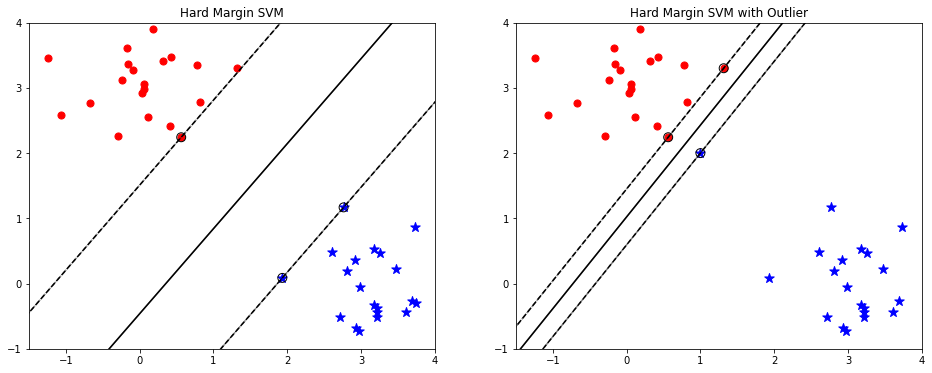

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import svm

# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=[(0, 3), (3, 0)], cluster_std=[0.5, 0.5], random_state=6)
idx_cls_0 = np.where(y == 0)
idx_cls_1 = np.where(y == 1)
id_max = np.argmax(X, axis=0)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# fit the model
for i in range(2):
    # Adjust outlier
    if i == 1:
      X[id_max[0]] = [1, 2] 

    clf = svm.SVC(kernel='linear', C=100)
    clf.fit(X, y)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin
    # plot the line, the points, and the nearest vectors to the plane
    ax[i].plot(xx, yy, 'k-')
    ax[i].plot(xx, yy_down, 'k--')
    ax[i].plot(xx, yy_up, 'k--')

    ax[i].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k',
                cmap=cm.get_cmap('RdBu'))
    

    ax[i].scatter(X[idx_cls_0, 0], X[idx_cls_0, 1], c='red', marker='o', s=50)
    ax[i].scatter(X[idx_cls_1, 0], X[idx_cls_1, 1], c='blue', marker='*', s=100)

    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    x_min = -1.5
    x_max = 4
    y_min = -1
    y_max = 4

    # Put the result into a contour plot
    ax[i].contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

    ax[i].set_xlim(x_min, x_max)
    ax[i].set_ylim(y_min, y_max)
    if i == 0:
      ax[i].set_title('Hard Margin SVM')
    else:
      ax[i].set_title('Hard Margin SVM with Outlier')

plt.show()

<!-- ![](https://imgur.com/8B67kPe.png) -->
**Hình 1:** Hình bên trái là _phân loại đường biên cứng_ (_Hard margin SVM_) đối với tập dữ liệu thông thường. Hình bên phải là _phân loại đường biên cứng_ đối với dữ liệu chứa điểm ngoại lai (là điểm hình sao được khoanh tròn). Phương pháp _phân loại đường biên cứng_ buộc phải phân loại đúng mọi điểm dữ liệu, bao gồm cả điểm ngoại lai. Điều này khiến cho đường biên phân chia bị thu hẹp lại. Khi đó qui luật phân chia sẽ không còn giữ được yếu tố tổng quát và dẫn tới hiện tượng quá khớp (_overfitting_). Kết quả dự báo trên tập _kiểm tra_ khi đó sẽ kém hơn so với tập _huấn luyện_.

Để khắc phục hạn chế của _phân loại đường biên cứng_, kỹ thuật _phân loại đường biên mềm_ (_Sorf Margin Classification_) chấp nhận đánh đổi để mở rộng lề và cho phép phân loại sai các điểm ngoại lai. Cụ thể hơn, thuật toán sẽ chấp nhận một số điểm bị rơi vào vùng của lề (vùng nằm giữa hai đường nét đứt, vùng này còn được gọi là vùng không an toàn) nhưng trái lại, chi phí cơ hội của sự đánh đổi đó là độ rộng lề lớn hơn. Đường biên phân chia được tạo ra từ kỹ thuật này thường nắm được tính _tổng quát_ và hạn chế hiện tượng _quá khớp_.

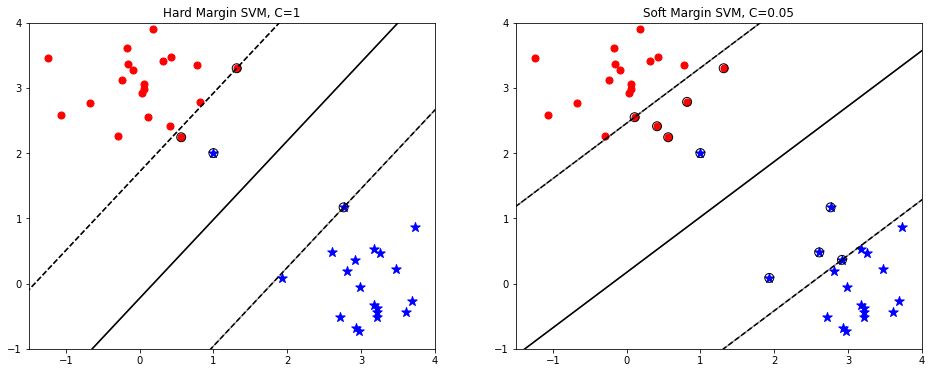

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import svm

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# fit the modelf
for i, (name, penalty) in enumerate([('hard margin', 1), ('soft margin', 0.05)]):
    clf = svm.SVC(kernel='linear', C=penalty)
    clf.fit(X, y)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    ax[i].plot(xx, yy, 'k-')
    ax[i].plot(xx, yy_down, 'k--')
    ax[i].plot(xx, yy_up, 'k--')

    ax[i].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k',
                cmap=cm.get_cmap('RdBu'))
    

    ax[i].scatter(X[idx_cls_0, 0], X[idx_cls_0, 1], c='red', marker='o', s=50)
    ax[i].scatter(X[idx_cls_1, 0], X[idx_cls_1, 1], c='blue', marker='*', s=100)

    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    x_min = -1.5
    x_max = 4
    y_min = -1
    y_max = 4

    # Put the result into a contour plot
    ax[i].contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

    ax[i].set_xlim(x_min, x_max)
    ax[i].set_ylim(y_min, y_max)
    if i == 0:
      ax[i].set_title('Hard Margin SVM, C={}'.format(penalty))
    else:
      ax[i].set_title('Soft Margin SVM, C={}'.format(penalty))

plt.show()

**Hình 2:** Phân loại biên cứng (bên trái) và phân loại biên mềm (bên phải) trong SVM. Chúng ta nhận thấy đối với đường biên mềm thì SVM chấp nhận một số điểm rơi vào vùng an toàn để nhằm tạo ra một đường biên phân chia tổng quát hơn. Trong khi phân loại theo đường biên cứng thì không chấp nhận những điểm dữ liệu bị lấn sang phía bên kia của vùng an toàn (là đường nét đứt).

## 7.3.2. Suy xét lại hàm chi phí cho phân loại đường biên mềm SVM

Ý tưởng của _phân loại đường biên mềm_ là mở rộng lề. Nhưng chúng ta không thể mở rộng lề ra vô cùng vì như vậy mọi điểm đều nằm trong đường biên phân chia và đường biên phân chia trở nên vô nghĩa. Quá trình mở rộng lề sẽ bị kìm hãn ở một mức độ nhất định sao cho nếu các điểm bị lấn vào đường biên thì không được lấn quá nhiều. Tức là đối với những điểm bị rơi vào _vùng không an toàn_ thì tổng khoảng cách của chúng tới mép của lề mà gần hơn với mặt phẳng của nhãn ground truth của chúng là nhỏ nhất. Khoảng cách từ một điểm tới mép đường biên (nét đứt) khi nó bị lấn lề là:

$$d(Z_i, H) \triangleq \xi_i = |b+\mathbf{w}^{\intercal}\mathbf{x}_i-y_i|$$

**Bài tập:** Chứng minh công thức khoảng cách trên khá đơn giản, xin dành cho bạn đọc.

Trong hàm mất mát chúng ta cần tối thiểu hoá thêm tổng khoảng cách những điểm bị lấn lề. Cộng thêm những khoảng cách này vào hàm mất mát ta được bài toán tối ưu:

$$\begin{eqnarray}
\hat{\mathbf{w}}, \hat{b} & = & \arg \min ~[~||\mathbf{w}||_2 + C \sum_{Z_j \in \mathcal{M}} |b+\mathbf{w}^{\intercal}\mathbf{x}_i-y_i|~] \\
& = & \arg \min ~[~||\mathbf{w}||_2 + C \sum_{Z_j \in \mathcal{M}} \xi_i~]\\
\text{subject} & : & y_i(b+\mathbf{w}^{\intercal}\mathbf{x}_i) \geq 1 - \xi_i, \xi_i \geq 0 ~ \forall i=\overline{1, N} \tag{4}
\end{eqnarray}$$


Với $\mathcal{M}$ là tập hợp các điểm bị lấn lề.

Hệ số $C$ là một hệ số rất quan trọng thể hiện tỷ lệ đánh đối giữa độ rộng lề và sự vi phạm bằng cách xâm lấn vào lề. Một hệ số $C$ lớn sẽ cho thấy đóng góp vào hàm mất mát của một điểm vi phạm sẽ lớn hơn việc mở rộng lề. Do đó để hàm mất mát nhỏ thì chúng ta cần hạn chế các điểm vi phạm và chấp nhận một độ rộng lề nhỏ hơn.

Trái lại trường hợp $C$ nhỏ thường trả lại một độ rộng của lề lớn hơn và đồng thời mức độ xâm lấn là nhỏ hơn.

Khi tiến hành tinh chỉnh mô hình, chúng ta quan tâm nhiều tới hệ số $C$ vì nó ảnh hưởng trực tiếp tới hình dạng của đường biên và kiểm soát hiện tượng _quá khớp_.

Trong python để _phân loại đường biên mềm_ thì chúng ta có thể sử dụng module [sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) hoặc [sklearn.svm.LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) thông qua việc thiết lập đối số $C$ thấp. Ở ví dụ hình 2 bạn cũng có thể thấy với `Soft Margin SVM` thì chúng ta để $C=0.05$

`LinearSVC` cũng tương ứng với `SVC` với cấu hình `kernel='linear'`, module `LinearSVC` có tốc độ nhanh hơn so với `SVC` nên được khuyến nghị hồi qui với những tập dữ liệu lớn. Khi huấn luyện với bộ dữ liệu kích thước nhỏ (khoảng vài ngàn quan sát) thì có thể sử dụng SVC. Ưu điểm của `SVC` đó là chúng ta được phép lựa chọn đa dạng các phép biến đổi kernel. Trong khi `LinearSVC` là phương pháp dựa trên kernel `linear`. Trong `LinearSVC` cho phép chúng ta lựa chọn được loại hàm điều chuẩn thông qua đối số `penalty` và dạng của hàm mất mát thông qua đối số `loss`.

Tiếp theo chúng ta sẽ cùng tìm hiểu về _tạo lập đặc trưng_ (_feature engineering_) trong SVM.

# 7.4. Kỹ thuật tạo đặc trưng

Trong thuật toán _phân loại đường biên mềm_ SVM chúng ta sẽ quyết định nhãn cho một điểm dữ liệu dựa vào đường biên phân loại như sau:

$$\begin{split}
y = \left\{
\begin{matrix}
~1 & \text{ if } b + \mathbf{w}^{\intercal}\mathbf{x}_i \geq 0 \\
-1 & \text{ if otherwise}
\end{matrix}
\right.\end{split}$$

Đường biên phân chia $b + \mathbf{w}^{\intercal}\mathbf{x}_i$ sẽ là một đường thẳng trong không gian hai chiều và trong không gian 3 chiều đường biên này là một mặt phẳng (_plane_). Trong không gian nhiều hơn 3 chiều thì chúng ta gọi đường biên phân chia của SVM là một siêu phẳng (_hyperplane_). Hình dạng của những đường biên phân chia tuyến tính này là tương đối đơn giản nên để gia tăng hiệu quả của mô hình SVM thì chúng ta sẽ sử dụng các hàm biến đổi phi tuyến trên các biến đầu vào. 

Một cách khái quát, giả định các hàm $\varphi_1(.), \varphi_2(.), \dots , \varphi_n(.)$ là các _hàm biến đổi phi tuyến_ (_non-linear transformation function_). Khi đó phương trình đường biên sẽ được chuyển sang phương trình của hàm biến đổi phi tuyến như sau:

$$h(\mathbf{x}, \mathbf{w}) = b + w_1 \varphi_1(\mathbf{x}) + w_2 \varphi_1(\mathbf{x}) + \dots + w_n \varphi_n(\mathbf{x}) \tag{5}$$

Những biến đổi phi tuyến giúp chúng ta tạo ra được những đường biên phân loại phức tạp hơn và giúp cải thiện độ chính xác của mô hình. Có một số dạng _hàm biến đổi phi tuyến_ là khá tường minh và dễ áp dụng như hàm _đa thức (polynormial)_ và hàm _Gaussian RBF_ (sẽ tìm hiểu bên dưới). 


## 7.4.1. Kỹ thuật polynormial

Trong hầu hết các bài toán machine learning, khi muốn gia tăng độ chính xác cho mô hình thì chúng ta thường sử dụng kỹ thuật _tạo lập đặc trưng đa thức_ (_polynormial feature_). Kỹ thuật này sẽ thêm những biến bậc cao (chẳng hạn như $x_1^2, x_1^3$) và biến tích chéo (chẳng hạn $x_1 x_2, x_1^2 x_2$) vào mô hình để gia tăng khả năng biểu diễn cho mô hình phân loại. Kỹ thuật này đã được giới thiệu và áp dụng trong các mô hình _hồi qui tuyến tính_, _hồi qui Logistic_ ở những chương trước.

## 7.4.2. Tạo lập đặc trưng Similarity

Bên cạnh phương pháp _tạo lập đặc trưng đa thức_ (_polynormial_) chúng ta còn sử dụng một phương pháp tạo lập đặc trưng tương đồng dựa trên hàm _Gaussian RBF_. Trên phân phối của tập dữ liệu chúng ta xác định một tập hợp các điểm landmark.
Landmarks ở đây được hiểu như là những điểm tiêu biểu đại diện cho các nhãn.

Một hàm độ đo _Gaussian RBF_ (RBF là viết tắt của _radial basis function_) về bản chất là khoảng cách hoặc mức độ tương đồng giữa một điểm dữ liệu $\mathbf{x}$ bất kỳ với một điểm landmark $l$ có dạng như sau:

$$\varphi(\mathbf{x}, l) = \exp(-\gamma||\mathbf{x}-l||_2^2)$$

Trong đó $\gamma$ là hằng số và $||\mathbf{x}||_2$ là [chuẩn bậc hai](https://phamdinhkhanh.github.io/deepai-book/ch_algebra/appendix_algebra.html#khai-niem-chuan) của $\mathbf{x}$.

Đây là một hàm có phân phối đồng dạng với phân phối chuẩn nên hình dạng của chúng là một hình quả chuông đối xứng qua điểm landmark.

![](https://ds055uzetaobb.cloudfront.net/image_optimizer/1dbcc5a80e3fb541aa4678fcff58bb26ca717902.png)

Giá trị của $\varphi(\mathbf{x}, l)$ sẽ tiến gần tới 1 trong trường hợp $\mathbf{x}$ và $l$ gần nhau và trường hợp những điểm này là cách xa nhau thì giá trị $\varphi(\mathbf{x}, l)$ sẽ tiến dần tới 0.

Sau khi đưa thêm các đặc trưng _Gaussian RBF_ vào mô hình thì các điểm phân phối gần landmark có giá trị kernel gần 1 và tách biệt so với các điểm nằm cách xa landmark có giá trị gần 0. Chúng ta sẽ thấy rõ sự tách biệt trên không gian chiếu.

![](https://i.imgur.com/wlBAdui.jpeg)

**Hình 3:** Chẳng hạn trong hình minh hoạ trên chúng ta có hai điểm landmark là $l_1$ và $l_2$ tạo thành một hình dạng phân phối đặc trưng cho một lớp (phân phối được bao quanh bởi đường nét đứt). Điểm $\mathbf{x}_1$ gần $l_1$ và $\mathbf{x}_2$ nằm gần $l_2$. Khi thực hiện phép chiếu dựa trên biến đổi _Gaussian RBF_  thì toạ độ điểm $\mathbf{x}$ sẽ được ánh xạ thành:

$$(\varphi(\mathbf{x}, l_1), \varphi(\mathbf{x},l_2))$$

Thể hiện trên hình bên phải là 3 điểm ảnh tương ứng với $\mathbf{x}_1, \mathbf{x}_2, \mathbf{x}_3$ của hình bên trái. Ta nhận thấy $\mathbf{x}_1$ do gần $l_1$ hơn nên có $f_1$ cao và $f_2$ thấp; tương tự như vậy $\mathbf{x}_2$ gần $l_2$ hơn nên có $f_2$ cao, $f_1$ thấp. $\mathbf{x}_3$ thì cách xa cả hai điểm landmarks này nên có toạ độ sát điểm $(0, 0)$. Trên không gian chiếu ta dễ dàng phân biệt được ảnh của các điểm này bằng một đường biên nét đứt.

# 7.5. Kernel trong SVM

Sử dụng các phương pháp tạo lập đặc trưng thường mang lại hiệu quả. Tuy nhiên chúng có một số hạn chế đó là chúng ta phải thêm một lượng rất lớn các đặc trưng cho từng quan sát và dẫn tới chi phí tính toán gia tăng một cách đáng kể. Chẳng hạn nếu sử dụng hàm đa thức với bậc là 3 trên $n$ biến thì số lượng biến bậc 3 được sinh ra có thể lên tới $C_{n}^{1}+2*C_{n}^{2} + C_{n}^{3}$, đây là một giá trị rất lớn và gây lãng phí về chi phí tính toán. Trong SVM có một kỹ thuật giúp cho vẫn có thể áp dụng các biến đổi đặc trưng trên biến đầu vào mà không cần phải tính toán các đặc trưng sau biến đổi mà ta sẽ tìm hiểu bên dưới.

Ở mục 7.2.5 chúng ta biết rằng nhãn của một dự báo có thể được tính trên các điểm thuộc tập véc tơ hỗ trợ. 

$$\begin{eqnarray} h_{\mathbf{w}, b}(\mathbf{x}_i) & = & b + \sum_{j\in \mathcal{S}} \lambda_j y_j \mathbf{x}_{j}^{\intercal} \mathbf{x}_i \\
\end{eqnarray}$$

Trong trường hợp biến đổi phi tuyến thì phương trình đường biên trở thành:

$$\begin{eqnarray} h_{\mathbf{w}, b}(\varphi(\mathbf{x}_i)) & = & b + \sum_{j\in \mathcal{S}} \lambda_j y_j \varphi(\mathbf{x}_{j})^{\intercal} \varphi(\mathbf{x}_i) \\
& = & b + \sum_{j\in \mathcal{S}} \lambda_j y_j \phi(\mathbf{x}_{j}, \mathbf{x}_i)
\end{eqnarray}$$

Để tính toán ra hàm $\varphi()$ là khá vất vả vì có một số trường hợp _hàm biến đổi phi tuyến_ $\varphi()$ tồn tại dưới một dạng tiềm ẩn (_implicit function_). Tức là chúng ta không thể tìm được trực tiếp dạng hàm mà chỉ biết được chúng tồn tại. Thay vì phải tính hàm $\varphi()$ thì chúng ta sẽ tìm cách tính hàm $\phi(\mathbf{x}_j, \mathbf{x}_i)$ sẽ đơn giản hơn rất nhiều. Từ đó hình thành nên một kĩ thuật rất quan trọng trong SVM dựa trên những khám phá về hàm _hạt nhân_ (_kernel function_) $\phi(\mathbf{x}_j, \mathbf{x}_i)$ đó là kỹ thuật _kernel SVM_.

Tiếp theo chúng ta sẽ tìm hiểu về _kernel SVM_.


## 7.5.1. Định lý merce về kernel

Như chúng ta đã phân tích, sử dụng các hàm biến đổi phi tuyến thì thường dẫn tới sự lãng phí về chi phí tính toán. Trong khi để dự báo nhãn thì chúng ta chỉ cần sử dụng hàm kernel là đủ. Như vậy điểm mấu chốt để giảm bớt chi phí tính toán đó là chúng ta phải tìm ra được hàm kernel phù hợp.

Theo định lý merce thì hàm $\phi(\mathbf{x},\mathbf{y})$ cần thoả mãn một số điều kiện để trở thành một hàm kernel. Trong đó một điều kiện quan trọng là $\phi()$ phải là một hàm liên tục và đối xứng. Tức là $\phi(\mathbf{x},\mathbf{y}) = \phi(\mathbf{y},\mathbf{x})$. Tính chất này là để đảm bảo tồn tại một hàm $\varphi$ ánh xạ các véc tơ $\mathbf{x}$ và $\mathbf{y}$ lên không gian cao chiều sao cho tích vô hướng: $\phi(\mathbf{x},\mathbf{y}) = \varphi(\mathbf{x})^{\intercal} \varphi(\mathbf{y})$.

Lưu ý rằng hầu hết mọi hàm kernel đều thoả mãn mọi điều kiện merce nhưng vẫn có một số hàm kernel không thoả mãn vẫn hoạt động khá hiệu quả.

Hàm $\varphi(\mathbf{x})$ ở đây là một véc tơ biểu diễn véc tơ $\mathbf{x}$ trong không gian cao chiều mới. Giả định chúng ta muốn áp dụng một hàm kernel đa thức bậc 2 dạng $\phi(\mathbf{x}, \mathbf{y}) = (\mathbf{x}^{\intercal}\mathbf{y})^2$ thì $\varphi$ có thể là hàm $\varphi(\mathbf{x}) = [x_1^2, \sqrt{2 x_1 x_2}, x_2^2]^{\intercal}$. Trong đó $\mathbf{x} = [x_1, x_2]$ và $\mathbf{y} = [y_1, y_2]$. Thật vậy:

$$\begin{eqnarray}
\varphi(\mathbf{x})^{\intercal} \varphi(\mathbf{y}) & = & [x_1^2, \sqrt{2 x_1 x_2}, x_2^2] [y_1^2, \sqrt{2 y_1 y_2}, y_2^2]^{\intercal} \\
& = & x_1^2y_1^2 + 2 x_1 x_2 y_1 y_2 + x_2^2 y_2^2 = (x_1 y_1 + x_2 y_2)^2 = (\mathbf{x}^{\intercal}\mathbf{y})^2
\end{eqnarray}$$

Như vậy từ không gian 2 chiều, các véc tơ đã được biến đổi sang không gian 3 chiều. Trong machine learning có một số hàm kernel được sử dụng khá phổ biến. Chúng ta sẽ tìm hiểu những hàm kernel này bên dưới.

## 7.5.2. Các kernel khác cho SVM

Đây là những hàm _kernel_ phổ biến đã được tích hợp bên trong package sklearn.

* Kernel RBF: Kernel RBF dựa trên hàm _Gaussian RBF_. 
Hàm biến đổi phi tuyến của kernel này là _hàm ẩn_ và tương đương với một đa thức với bậc vô hạn.

$$\phi(\mathbf{x}_1, \mathbf{x}_2) = \exp({-\gamma||\mathbf{x}_1}-\mathbf{x}_2||_2^2)$$


* Kernel tuyến tính (_linear_): Đây là tích vô hướng giữa hai véc tơ.

$$\phi(\mathbf{x}_1, \mathbf{x}_2) = \mathbf{x}_1^{\intercal}\mathbf{x}_2$$

* Kernel đa thức (_poly_): Tạo ra một đa thức bậc cao kết hợp giữa hai véc tơ.

$$\phi(\mathbf{x}_1, \mathbf{x}_2) = (\gamma \mathbf{x}_1^{\intercal}\mathbf{x}_2+r)^d$$

* Kernel Sigmoid: Dựa trên kernel về đa thức, chúng ta đưa chuyển tiếp qua hàm tanh. Hàm tanh có thể biểu diễn theo hàm sigmoid nên đây được gọi là kernel Sigmoid.

$$\phi(\mathbf{x}_1, \mathbf{x}_2) = \text{tanh}(\gamma \mathbf{x}_1^{\intercal}\mathbf{x}_2+r)$$

Trong quá trình huấn luyện SVM chúng ta cần thử với những kernel khác nhau để tìm ra một kernel hiệu quả. Ở mục 6 thực hành các bạn sẽ được làm quen với việc tuning kernel.

Chú ý đối với các từng kernel thì chúng ta lại có thể tuning các siêu tham số (_hyperameter_) của chúng. Chẳng hạn như trong kernel đa thức chúng ta có thể tuning đối với bậc $d$ của đa thức và hệ số $\gamma$. Những phần này sẽ được hướng dẫn chi tiết hơn ở mục 6.

## 7.5.3. Dự báo nhãn

Nhãn của một quan sát trong mô hình _kernel SVM_ sẽ phụ thuộc vào giá trị độ lớn của đường biên:

$$ \begin{eqnarray} h_{\mathbf{w}, b}(\varphi(\mathbf{x}_i)) & = & b + \mathbf{w}^{\intercal}\varphi({\mathbf{x}_i}) \\
& = & b + (~ \sum_{j \in \mathcal{S}}\lambda_jy_j\varphi(\mathbf{x}_j)^{\intercal} ~) \varphi(\mathbf{x}_i) \\
& = & b + \sum_{j\in \mathcal{S}} \lambda_j y_j \varphi(\mathbf{x}_i)^{\intercal} \varphi(\mathbf{x}_i) \\
& = & b + \sum_{j\in \mathcal{S}} \lambda_j y_j \phi(\mathbf{x}_i, \mathbf{x}_j)
\end{eqnarray}$$

Từ dòng thứ $1$ sang dòng thứ $2$ là giá trị $\mathbf{w}$ được tính trực tiếp từ các điểm thuộc tập véc tơ hỗ trợ. Công thức trên rất quan trọng vì một số biến đổi kernel chúng ta sẽ không dễ dàng tìm được hàm $\varphi(\mathbf{x})$ một cách trực quan. Chẳng hạn như với _kernel RBF_ sẽ trả về hàm $\varphi(\mathbf{x})$ tương đương với một hàm đa thức bậc vô hạn dẫn tới việc tính toán $h_{\mathbf{w}, b}(\varphi(\mathbf{x}_i))$ là không khả thi và tốn kém. Nhưng thông qua hàm kernel thì chúng ta vẫn có thể tính toán được giá trị của phương trình đường biên một cách dễ dàng.


# 7.6. Ví dụ về bài toán SVM

Tiếp theo chúng ta sẽ cùng sử dụng SVM để phân loại bộ dữ liệu `iris`.

In [6]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()

X = iris["data"]
y = (iris["target"] == 2).astype(np.int8) # 1 if virginica, 0 else

In [7]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
svm_pl = Pipeline((
    ("scaler", StandardScaler()),
    ("linear_svc", SVC(C=1, kernel="linear", probability = True))
  )
)

svm_pl.fit(X, y)

scores = cross_val_score(svm_pl, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: {:.03f}, Standard Deviation Accuracy: {:.03f}'.format(np.mean(scores), np.std(scores)))

Mean Accuracy: 0.960, Standard Deviation Accuracy: 0.050


Dự báo cho một quan sát mới

In [8]:
# Dự báo nhãn
svm_pl.predict(np.array([[1.2, 3.3, 2.2, 4.5]]))

array([1], dtype=int8)

In [9]:
# Dự báo xác suất, chỉ được khi probability trong SVC() được set True.
svm_pl.predict_proba(np.array([[3.2, 3.0, 4.2, 4.5]]))

array([[3.0000009e-14, 1.0000000e+00]])

## 7.6.1. Bài toán SVM cho dữ liệu dạng phi tuyến

Mặc dù SVM có kết quả khá tốt cho bài toán phân loại nhưng có một số tình huống dữ liệu là phức tạp và yêu cầu chúng ta phải thực hiện các phép biến đổi phi tuyến đối với biến đầu vào để tạo thành những đường biên phức tạp hơn. Kỹ thuật chuẩn hoá đa thức (_polynormial_) được áp dụng để tạo ra những biến bậc cao sẽ hữu ích trong những tình huống này:

In [10]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

svm_ply_pl = Pipeline((
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("linear_svc", SVC(C=1, kernel="linear", probability = True))
  )
)

In [11]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(svm_ply_pl, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: {:.03f}, Standard Deviation Accuracy: {:.03f}'.format(np.mean(scores), np.std(scores)))

Mean Accuracy: 0.969, Standard Deviation Accuracy: 0.041


Như vậy sau khi áp dụng _chuẩn hoá đa thức_ thì độ chính xác đã tăng lên từ `0.96` lên `0.969`. Đây là một trong những kỹ thuật thường được áp dụng để giúp cải thiện độ chính xác cho SVM.

Trên thực thế thì kỹ thuật chuẩn hoá đa thức cũng tương tự như việc sử dụng kernel `poly` trong module SVC. Lưu ý rằng mặc dù kỹ thuật chuẩn hoá đa thức thường mang lại sự cải tiến đáng kể về độ chính xác cho mô hình nhưng số lượng biến mà nó tạo ra bao gồm những biến tích chéo (dạng $x_1^p x_2^q$) và biến bậc cao (dạng $x_1^l$) là rất lớn. Do đó sẽ dễ xảy ra hiện tượng _quá khớp_ và đồng thời gia tăng chi phí huấn luyện và tính toán.

Tiếp theo ta sẽ thực hành tuning kernel trong SVM.

## 7.6.2. Sử dụng kernel SVM

Khi huấn luyện mô hình SVM chúng ta cần thử với nhiều kernels khác nhau để tìm ra kernel tốt nhất cho bộ dữ liệu huấn luyện. Các kernel phổ biến đó là:
`linear, poly, rbf, sigmoid` như đã được giới thiệu ở mục 5.

Ngoài ra nếu mô hình gặp hiện tượng quá khớp thì chúng ta cần điều chỉnh giảm hệ số $C$ của mô hình SVM để gia tăng ảnh hưởng của thành phần kiểm soát.

In [12]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


kernels = ['linear', 'poly', 'rbf', 'sigmoid']

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

all_scores = []
# Đánh giá toàn bộ các mô hình trên tập K-Fold đã chia
for kernel in kernels:
  svm_kn_pl = Pipeline((
      ("scaler", StandardScaler()),
      ("linear_svc", SVC(C=1, kernel=kernel, probability = True))
    )
  )
  scores = cross_val_score(svm_kn_pl, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  all_scores.append((kernel, scores))

Text(0.5, 1.0, 'Scores Metrics')

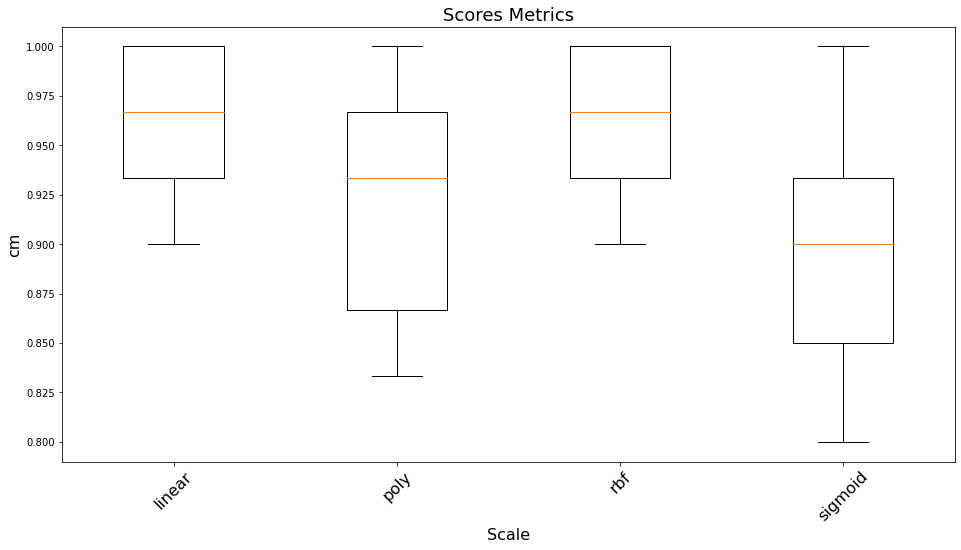

In [13]:
import matplotlib.pyplot as plt

# Draw bboxplot 
plt.figure(figsize=(16, 8))
plt.boxplot([score[1] for score in all_scores])
plt.xlabel('Scale', fontsize=16)
plt.ylabel('cm', fontsize=16)
plt.xticks(np.arange(len(kernels))+1, kernels, rotation=45, fontsize=16)
plt.title("Scores Metrics", fontsize=18)

Như vậy ta có thể thấy các kernel hiệu quả chính là `rbf` và `linear` khi cùng có giá trị trung vị vào khoảng 0.97 và cao hơn mức trung bình của kernel kém nhất là `Sigmoid` là 0.07 điểm. Đây là một mức cải thiện khá đáng kể cho một bài toán phân loại nhị phân.

## 7.6.3. tuning siêu tham số cho một kernel

Đối với mỗi một dạng hàm kernel, căn cứ vào phương trình của chúng ta có thể xác định được những siêu tham số cần tuning.

Chẳng hạn như đối với danh sách các kernel được cung cấp ở mục 5.1 thì chúng ta có thể tuning các tham số như sau:

* kernel tuyến tính: tham số C.
* kernel đa thức: tham số $C, \gamma, d$
* kernel RBF: tham số $C, \gamma$.
* kernel sigmoid: tham số $C, \gamma, d$

Công thức tổng quát của một mô hình SVC:

```
sklearn.svm.SVC(*, 
  C=1.0, 
  kernel='rbf', 
  degree=3, 
  gamma='scale', 
  coef0=0.0, 
  class_weight=None, 
  decision_function_shape='ovr',
  random_state=None
)
```


Trong class SVC của sklearn thì hệ số $\gamma$ tương ứng với đối số `coef0`, hệ số bậc đa thức $d$ là đối số `degree`, trọng số $C$ của hàm chi phí chính là đối số `C` và loại kernel là đối số `kernel`.

Ngoài ra trong trường hợp mẫu bị mất cân bằng nghiêm trọng thì chúng ta thiết lập `class_weight` để phạt nặng hơn những trường hợp mẫu thiểu số.

`decision_function_shape` là đối số cho phép chúng ta cấu hình kết quả xác suất dự báo trả về là theo phương pháp `one-vs-rest` hay `one-vs-one`. Nếu theo phương pháp `one-vs-rest` thì mô hình phân loại gồm $C$ nhãn sẽ được chia thành $C$ bài toán phân loại con, mỗi một bài toán tương ứng với một dự báo xác suất thuộc về nhãn $i$. Còn đối với bài toán `one-vs-one` chúng ta sẽ tìm cách xây dựng $C\times(C-1)$ mô hình phân loại cho một cặp nhãn $(i, j)$ bất kỳ. Đối với bài toán phân loại nhị phân thì `decision_function_shape = ovr` tương ứng với dự báo xác suất tương ứng với nhãn $(0, 1)$.

Bên dưới là một ví dụ mẫu về cách tuning tham số trên GridSearch đối với mô hình SVM.

In [14]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'clf__kernel':['linear', 'rbf', 'poly', 'sigmoid'],  # Các dạng hàm kernel
    'clf__C':[0.05, 1, 100], # Trọng số của phạt phân loại sai
    'clf__coef0': [2, 4], # Tương ứng với tham số gamma của đa thức
    'clf__degree': [1, 2, 3] # Bậc d của đa thức
}


pipeline = Pipeline(
    steps=[("clf", SVC())]
)

gscv = GridSearchCV(pipeline, parameters, cv=5, n_jobs=12, scoring='accuracy', return_train_score=True, error_score=0, verbose=3)
gscv.fit(X, y)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, error_score=0, estimator=Pipeline(steps=[('clf', SVC())]),
             n_jobs=12,
             param_grid={'clf__C': [0.05, 1, 100], 'clf__coef0': [2, 4],
                         'clf__degree': [1, 2, 3],
                         'clf__kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             return_train_score=True, scoring='accuracy', verbose=3)

# 7.7. Tổng kết

Như vậy qua chương này bạn đọc đã được giới thiệu những kiến thức cơ bản gồm:

1. Hàm mất mát trong SVM.
2. Khái niệm về đường biên và lề.
3. Bài toán phân loại SVM với đường biên mềm và đường biên cứng.
4. Các dạng bộ lọc trong SVM.
5. Phương pháp tuning tham số đối với mô hình SVM.

SVM làm một trong những thuật toán hoạt động khá hiệu quả trong lớp các bài toán phân loại và dự báo của học có giám sát. Nắm vững thuật toán này, bạn đọc sẽ có thêm công cụ để tạo ra những mô hình mạnh giúp giải quyết những vấn đề thực tế.

# 7.8. Bài tập

1. Hàm mất mát của SVM có dạng là một hàm có dạng như thế nào?
2. Phương trình đường biên của SVM được xác định như thế nào?
3. Dự báo nhãn của mô hình SVM sẽ căn cứ vào đâu?
4. Giả định mô hình hồi qui SVM đang gặp hiện tượng _quá khớp_. Làm thế nào để giảm thiểu hiện tượng quá khớp cho mô hình SVM?
5. Kernel trong SVM là gì? Kernel có tác dụng như thế nào đối với mô hình SVM?
6. Nêu các tiêu chuẩn để một hàm có thể trở thành một hàm kernel?
7. Có những dạng kernel chính nào trong SVM? Đặc điểm của chúng là gì?
8. Sử dụng hàm kernel có ưu điểm gì khi dự báo nhãn?
9. Kernel RBF có _hàm biến đổi phi tuyến_ là một hàm như thế nào?
10. Khi huấn luyện một mô hình SVM thì chúng ta cần tinh chỉnh những siêu tham số nào là chủ yếu?

# 7.9. Tài liệu

1. [SVM - wikipedia](https://en.wikipedia.org/wiki/Support-vector_machine)
2. [Support Vector Machine introduction to Machine Learning Algorithms](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47)
3. [SVM - Machine Learning Cơ bản](https://machinelearningcoban.com/2017/04/09/smv/)
4. [Chapter 7, Sparse Kernel Machines - Pattern Recognition Learning Information Statistics](https://www.amazon.com/Pattern-Recognition-Learning-Information-Statistics/dp/0387310738)
4. [Chapter 5, SVM - Hands-On Machine Learning with Scikit-Learn and TensorFlow](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1491962291)
5. [SVM model sklearn](https://scikit-learn.org/stable/modules/svm.html)
6. [Optimization loss function under the hood par](https://towardsdatascience.com/optimization-loss-function-under-the-hood-part-iii-5dff33fa015d#:~:text=The%20loss%20function%20of%20SVM,the%20raw%20model%20output%2C%20%CE%B8%E1%B5%80x.)